# BSPA Tutorial
# Tutorial 1 (MA and derivative filters)

### By Sravanth Chowdary Potluri CS20B1006

In [93]:
# importing the required libraries
import pandas as pd
import numpy as np

In [94]:
# loading the data into different dataframes from ecg files as xlxs
df1 = pd.read_excel('ECG1.xlsx')
df2 = pd.read_excel('ECG2.xlsx')
df3 = pd.read_excel('ECG3-1.xlsx')

In [95]:
# displaying the first 5 rows of the dataframes
print(df1.head())
print(df2.head())
print(df3.head())

    Column1   Column2
0  0.000000  1.655273
1  0.009615  1.640625
2  0.019231  1.655273
3  0.028846  1.689453
4  0.038462  1.733398
   Column1   Column2
0    0.000  1.655273
1    0.002  1.649234
2    0.004  1.644865
3    0.006  1.642062
4    0.008  1.640718
   Time    Signal
0  0.00  1.748563
1  0.02  1.581224
2  0.04  1.799771
3  0.06  1.705787
4  0.08  1.754905


### Tutorial 1 Question 1
Apply Moving average filter to ECG signal 1 that has sampling frequency
of 100Hz and compute frequency response of the designed filter.
(Window_size = 5)

In [96]:
# defining the moving average filter function
def moving_average_filter(data, window_size):
    # creating a list to store the filtered data
    filtered_data = []
    # iterating through the data
    for i in range(len(data)):
        # checking if the window size is greater than the index
        if i < window_size:
            # appending the mean of the data from 0 to i+1 to the filtered data
            filtered_data.append(np.mean(data[:i+1]))
        else:
            # appending the mean of the data from i-window_size to i+1 to the filtered data
            filtered_data.append(np.mean(data[i-window_size:i+1]))
    # returning the filtered data
    return filtered_data

# applying the moving average filter to the ECG signal 1
filtered_data = moving_average_filter(df1['Column2'], 5)

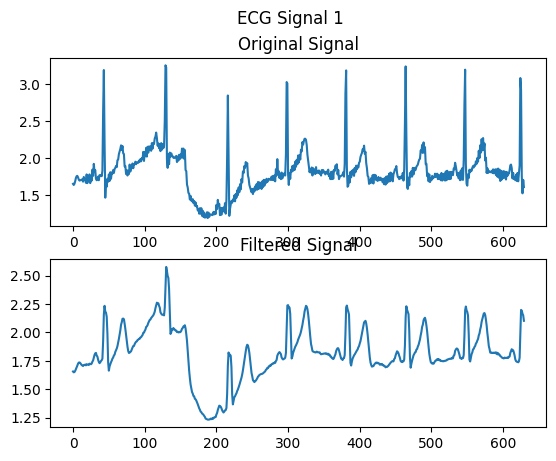

In [97]:
# plotting the original and filtered data in separate subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 1')
axs[0].plot(df1['Column2'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

In [98]:
# defining a function to compute the magnitude vs frequency response of the filter
def frequency_response(input_signal, output_signal, sampling_frequency):

    # Ensure signals have the same length
    if len(input_signal) != len(output_signal):
        raise ValueError("Input and output signals must have the same length.")

    input_fft = np.fft.fft(input_signal)
    output_fft = np.fft.fft(output_signal)

    # Estimate transfer function
    H = output_fft / input_fft

    # Calculate magnitude in dB
    mag_db = 20 * np.log10(np.abs(H))

    # Frequencies in Hz
    freqs_hz = np.fft.fftfreq(len(input_signal), d=1/sampling_frequency)

    # Plot the magnitude response
    plt.figure()
    plt.semilogx(freqs_hz, mag_db)  # Plot against frequencies in Hz
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Filter Frequency Response')
    plt.grid(True)
    plt.show()

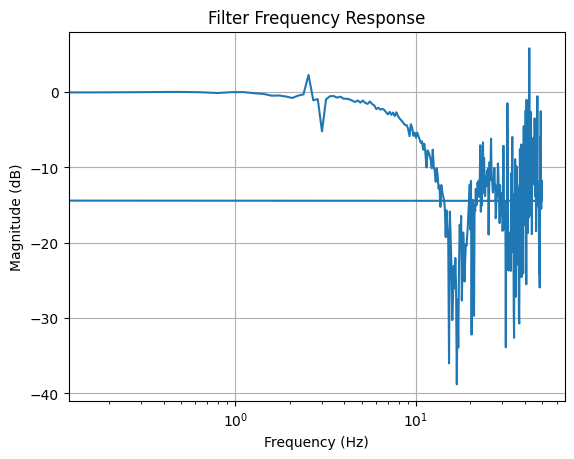

In [99]:
# computing the frequency response of the filter
frequency_response(df1['Column2'], filtered_data, 100)

In [100]:
import matplotlib.pyplot as plt

def frequency_response_from_formula(formula, sampling_frequency=1):
    """
    Calculates and plots the frequency response of a filter defined by its formula (transfer function).

    Args:
        formula: A string representing the filter's transfer function in the Z-domain (H(z)).
                 Example: ' (1 + 0.5*z**-1) / (1 - 0.8*z**-1)'
        sampling_frequency: The sampling frequency of the system (optional, default is 1).
    """

    def substitute_z(formula,z):
        """Helper function to substitute 'z' with the complex unit circle values"""
        return eval(formula)

    # Generate complex unit circle values (for frequency sweep)
    num_points = 256   # Adjust for desired resolution
    omega = np.linspace(0, np.pi, num_points)
    z = np.exp(1j * omega)

    # Evaluate H(z) on the unit circle
    H = np.array([substitute_z(formula, z_val) for z_val in z])

    # Calculate magnitude and phase response
    H_mag = np.abs(H)
    H_phase = np.angle(H)

    # Plot responses
    plt.figure(figsize=(8, 5))

    # Magnitude Response
    plt.subplot(2, 1, 1)
    plt.plot(omega * sampling_frequency / (2 * np.pi) , 20 * np.log10(H_mag))
    plt.ylabel('Magnitude (dB)')
    plt.title('Frequency Response (Formula)')
    plt.grid(True)

    # Phase Response
    plt.subplot(2, 1, 2)
    plt.plot(omega * sampling_frequency / (2 * np.pi), H_phase)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.grid(True)

    plt.show()

<string>:1: RuntimeWarning: invalid value encountered in scalar divide


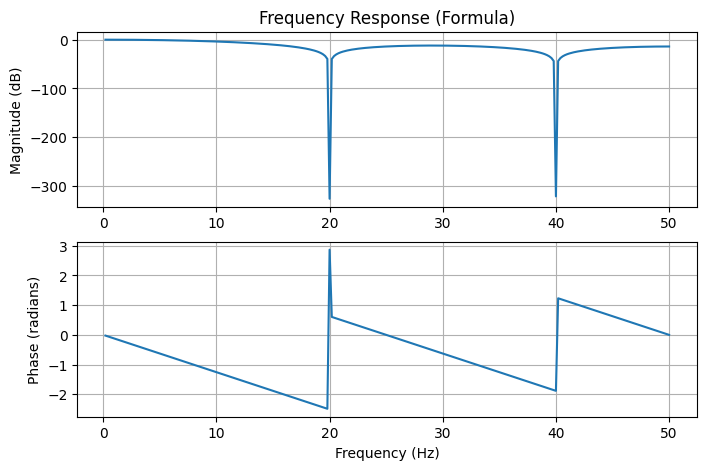

In [101]:
# finding the frequency response from the formula
formula = '(1 - z**-5) / (5 - 5*z**-1)'
frequency_response_from_formula(formula,100)

### Tutorial 1 Question 2

Apply Moving average filter to ECG signal 2 that has sampling frequency
of 500Hz and compute frequency response of the designed filter.
(Window_size = 5)

In [102]:
# applying the moving average filter to the ECG signal 2
filtered_data = moving_average_filter(df2['Column2'], 5)

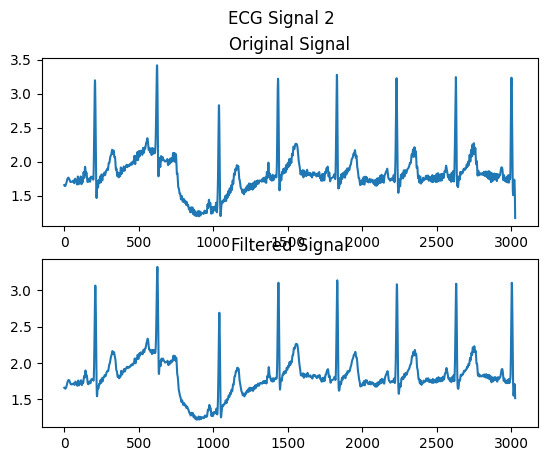

In [103]:
# plotting the original and filtered data in separate subplots
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 2')
axs[0].plot(df2['Column2'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

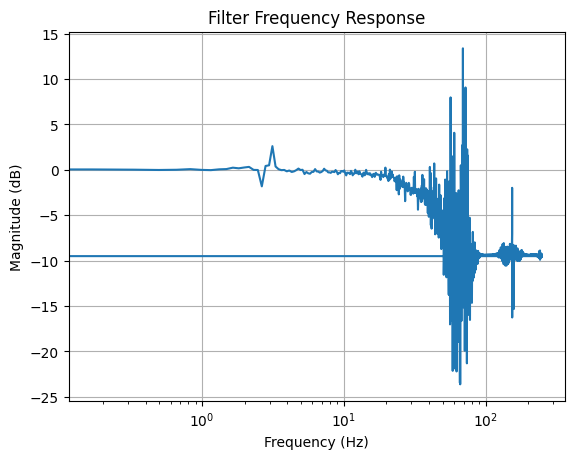

In [104]:
# computing the frequency response of the filter
frequency_response(df2['Column2'], filtered_data, 500)

<string>:1: RuntimeWarning: invalid value encountered in scalar divide


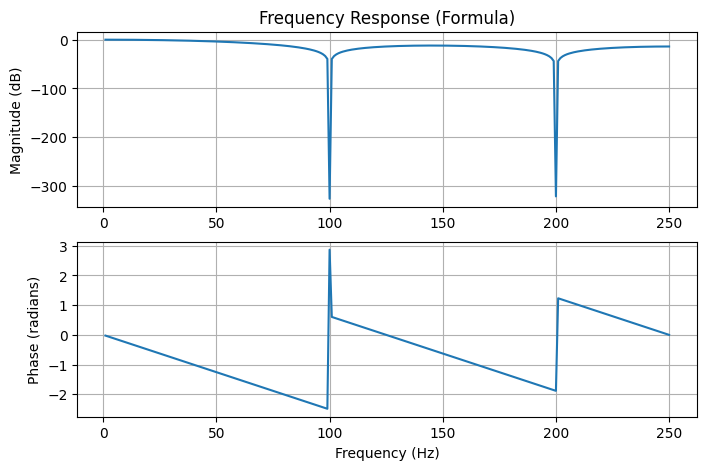

In [105]:
# finding the frequency response from the formula
formula = '(1 - z**-5) / (5 - 5*z**-1)'
frequency_response_from_formula(formula,500)

### Tutorial 1 Question 3
Apply Moving average filter to ECG signal 3 that has sampling frequency
of 50Hz and compute frequency response of the designed filter.
(Window_size = 5)

In [106]:
# applying the moving average filter to the ECG signal 3
filtered_data = moving_average_filter(df3['Signal'], 5)

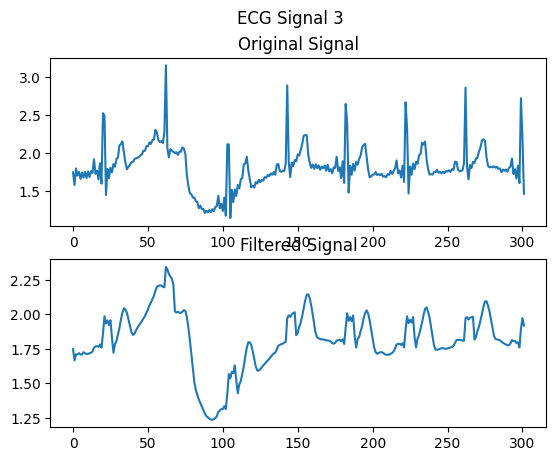

In [107]:
# plotting the original and filtered data in separate subplots
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 3')
axs[0].plot(df3['Signal'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

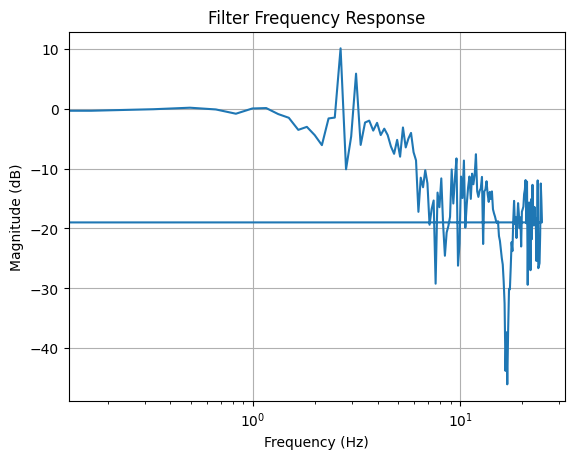

In [108]:
# computing the frequency response of the filter
frequency_response(df3['Signal'], filtered_data, 50)

### Tutorial 1 Question 4

Apply again MA filter to output of question 1 and find the frequency
response of the filter.

In [109]:
# applying the moving average filter to the output of question 1
filtered_data = moving_average_filter(moving_average_filter(df1['Column2'],5), 5)

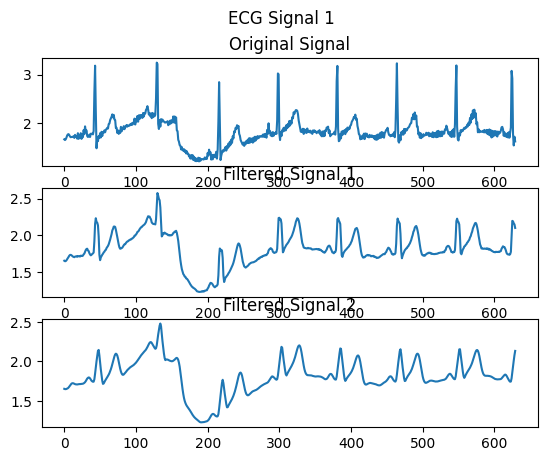

In [110]:
# plotting 3 different signals in separate subplots
fig, axs = plt.subplots(3)
fig.suptitle('ECG Signal 1')
axs[0].plot(df1['Column2'])
axs[0].set_title('Original Signal')
axs[1].plot(moving_average_filter(df1['Column2'],5))
axs[1].set_title('Filtered Signal 1')
axs[2].plot(filtered_data)
axs[2].set_title('Filtered Signal 2')
plt.show()

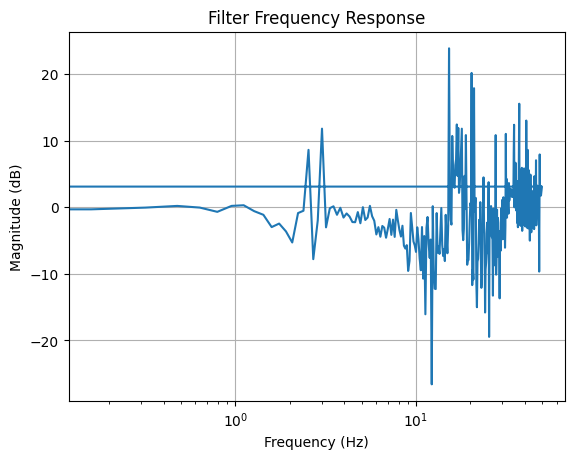

In [111]:
# computing the frequency response of the filter
frequency_response(moving_average_filter(df1['Column2'],5), filtered_data, 100)

<string>:1: RuntimeWarning: invalid value encountered in scalar divide


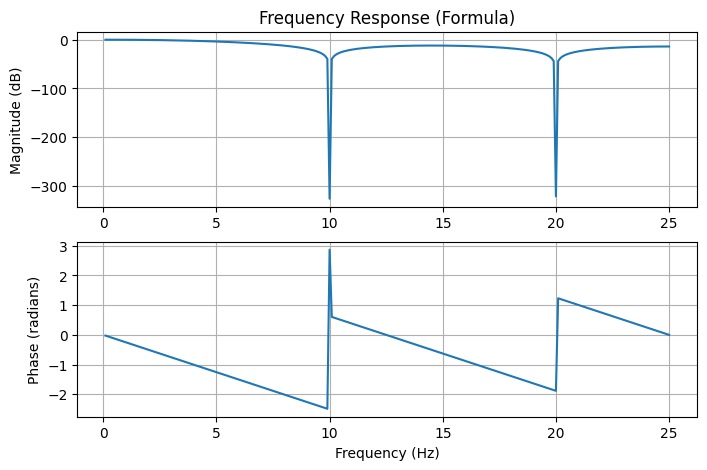

In [112]:
# finding the frequency response from the formula
formula = '(1 - z**-5) / (5 - 5*z**-1)'
frequency_response_from_formula(formula,50)

### Tutorial 2 Question 1

Apply second order derivative filter to ECG signal 1 & 2 and find
frequency response of the designed filter.

In [113]:
# defining the second order derivative filter function
def second_order_derivative_filter(data):
    # creating a list to store the filtered data
    filtered_data = []
    # iterating through the data
    for i in range(len(data)):
        # checking if the index is less than 2
        if i < 2:
            # appending 0 to the filtered data
            filtered_data.append(0)
        else:
            # appending the second order derivative of the data to the filtered data
            filtered_data.append(data[i-2] - 2*data[i] + data[i-2])
    # returning the filtered data
    return filtered_data

In [114]:
# applying the second order derivative filter to the ECG signal 1
filtered_data = second_order_derivative_filter(df1['Column2'])

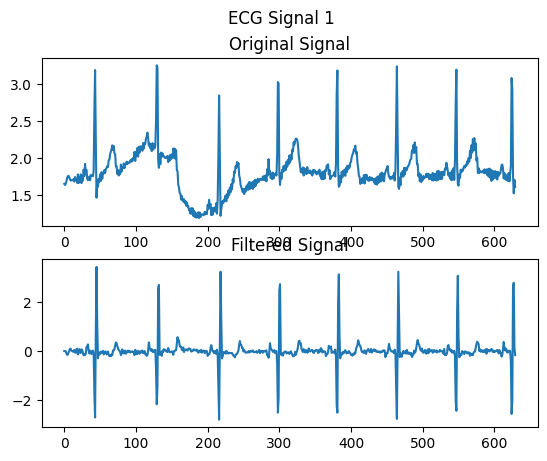

In [115]:
# plotting the original and filtered data in separate subplots
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 1')
axs[0].plot(df1['Column2'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

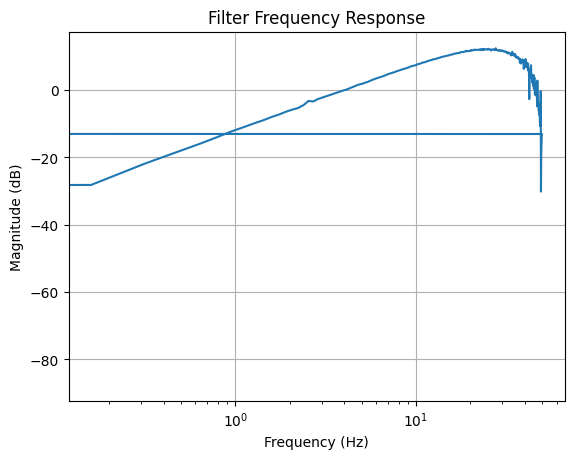

In [116]:
# computing the frequency response of the filter
frequency_response(df1['Column2'], filtered_data, 100)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_17516/246417300.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(omega * sampling_frequency / (2 * np.pi) , 20 * np.log10(H_mag))


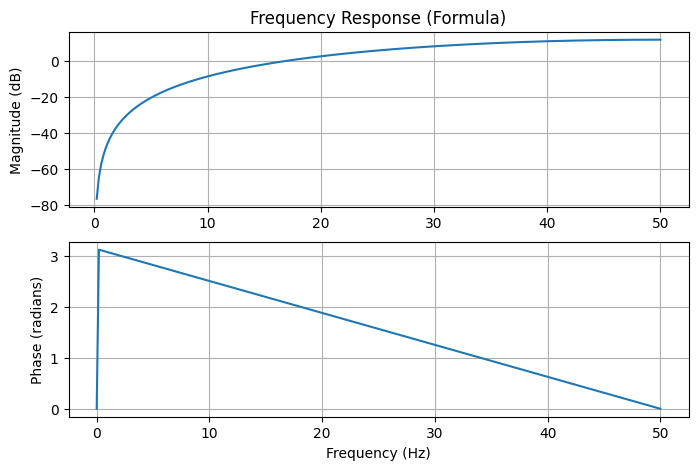

In [117]:
# finding the frequency response from the formula for second order derivative
formula = '(1- 2*z**-1 + z**-2)'
frequency_response_from_formula(formula,100)

In [118]:
# applying the second order derivative filter to the ECG signal 2
filtered_data = second_order_derivative_filter(df2['Column2'])

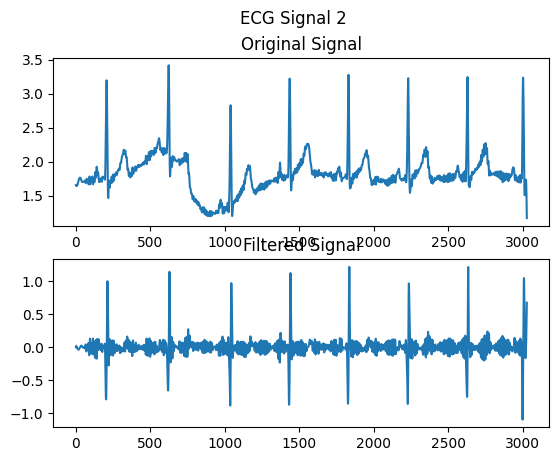

In [119]:
# plotting the original and filtered data in separate subplots
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 2')
axs[0].plot(df2['Column2'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

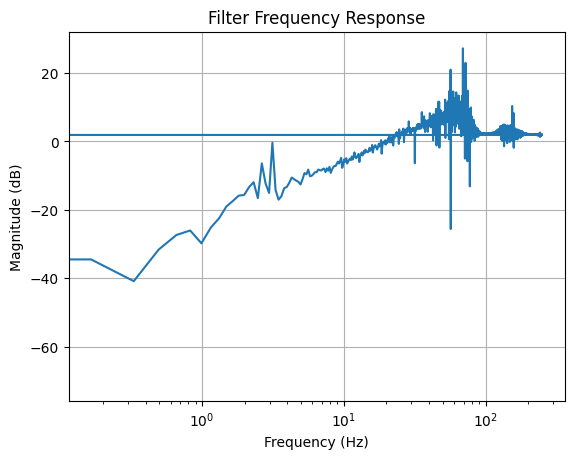

In [120]:
# computing the frequency response of the filter
frequency_response(df2['Column2'], filtered_data, 500)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_17516/246417300.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(omega * sampling_frequency / (2 * np.pi) , 20 * np.log10(H_mag))


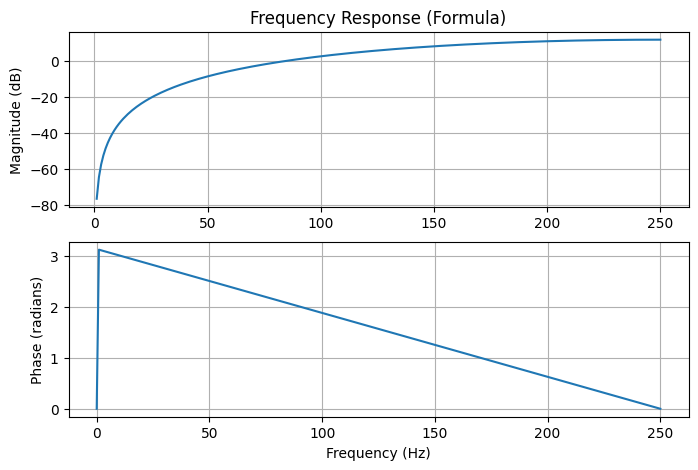

In [121]:
# finding the frequency response from the formula for second order derivative
formula = '(1- 2*z**-1 + z**-2)'
frequency_response_from_formula(formula,500)

### Tutorial 2 Question 2

Apply second order derivative filter to ECG signal 3 and find
frequency response of the designed filter.

In [122]:
# defining the third order derivative
def third_order_derivative_filter(data):

    # Creating a list to store the filtered data
    filtered_data = []

    # Checking if the data length is less than 3
    if len(data) < 3:
        # Returning an empty list if the data length is less than 3
        return filtered_data

    # Iterating through the data
    for i in range(len(data)):
        # Checking if the index is less than 2
        if i < 2:
            # Appending 0 to the filtered data
            filtered_data.append(0)
        elif i < 3:
            # Appending the second order derivative of the data to the filtered data
            filtered_data.append(data[i-2] - 2*data[i-1] + data[i])
        else:
            # Appending the third order derivative of the data to the filtered data
            filtered_data.append(data[i-3] - 3*data[i-2] + 3*data[i-1] - data[i])

    # Returning the filtered data
    return filtered_data


In [123]:
# applying the third order derivative filter to the ECG signal 3
filtered_data = third_order_derivative_filter(df3['Signal'])

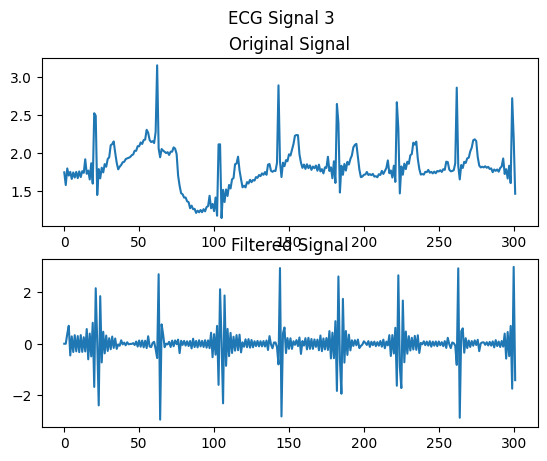

In [124]:
# plotting the original and filtered data in separate subplots
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 3')
axs[0].plot(df3['Signal'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

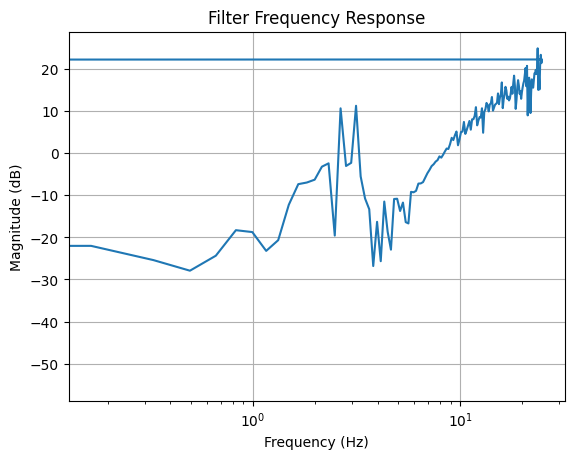

In [125]:
# computing the frequency response of the filter
frequency_response(df3['Signal'], filtered_data, 50)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_17516/246417300.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(omega * sampling_frequency / (2 * np.pi) , 20 * np.log10(H_mag))


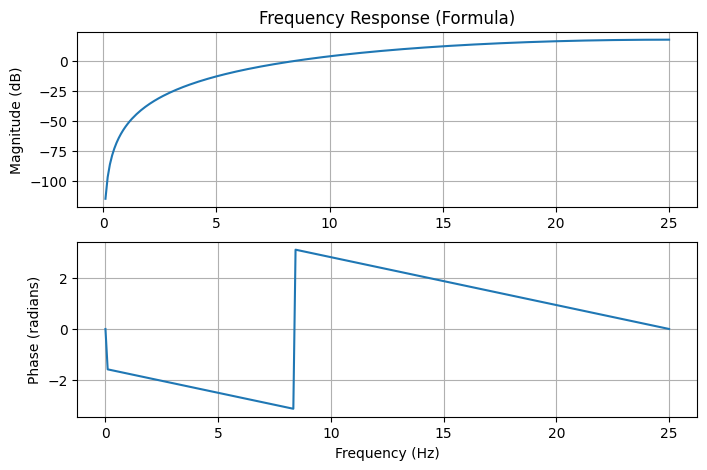

In [126]:
# finding the frequency response from the formula for third order derivative
formula = '(1- 3*z**-1 + 3*z**-2 - z**-3)'
frequency_response_from_formula(formula,50)

### Tutorial 2 Question 2

Perform 4-point central difference operation on ECG signal 1 and find
the frequency response of the same.

In [127]:
# defining 3 point central difference function
def central_difference_3pt(signal):

  # Input validation
  if len(signal) < 3:
    raise ValueError("Signal length must be at least 3 for central difference.")

  # Calculate central difference
  central_diff = [0] * len(signal)  # Initialize a list for results
  for i in range(2, len(signal)):
    central_diff[i] = (signal[i] - signal[i - 2]) / 2

  return central_diff

In [128]:
# applying the function on the data
filtered_data = central_difference_3pt(df1['Column2'])

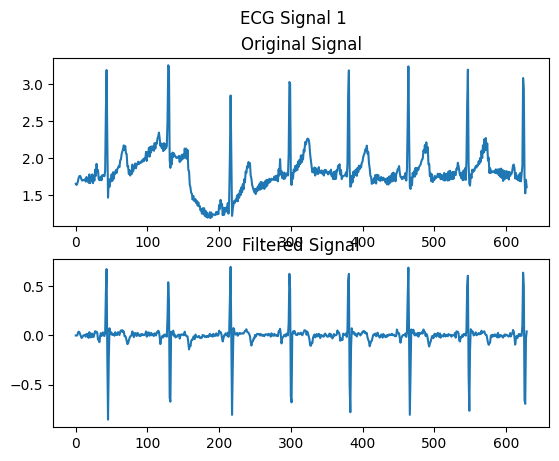

In [129]:
# plotting the original and filtered data in separate subplots
fig, axs = plt.subplots(2)
fig.suptitle('ECG Signal 1')
axs[0].plot(df1['Column2'])
axs[0].set_title('Original Signal')
axs[1].plot(filtered_data)
axs[1].set_title('Filtered Signal')
plt.show()

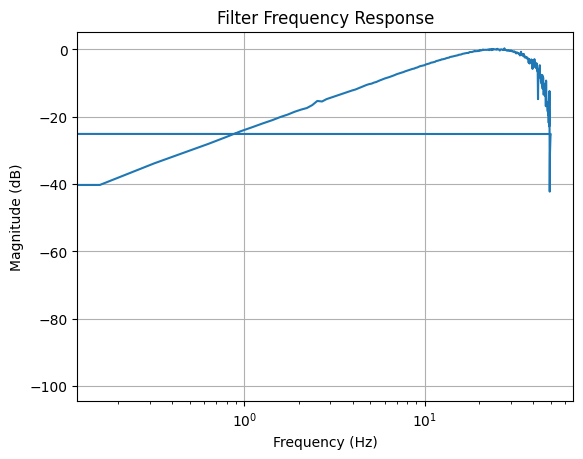

In [130]:
# computing the frequency response of the filter
frequency_response(df1['Column2'], filtered_data, 100)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_17516/246417300.py:34: RuntimeWarning: divide by zero encountered in log10
  plt.plot(omega * sampling_frequency / (2 * np.pi) , 20 * np.log10(H_mag))


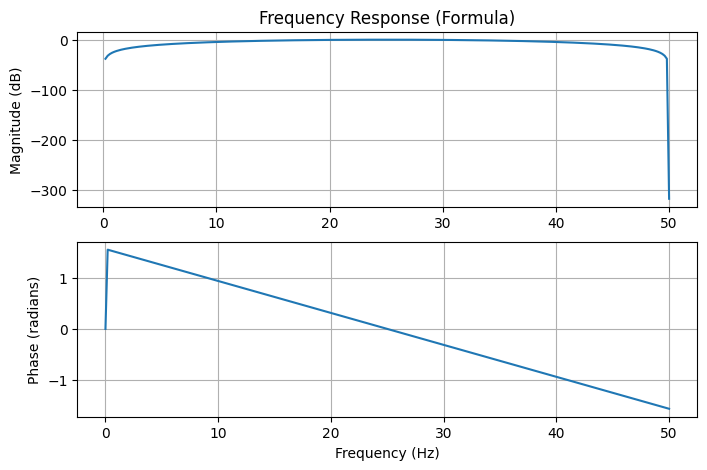

In [131]:
# finding the frequency response from the formula for three point central difference operation
formula = '(1/2) * (1 - z**-2)'
frequency_response_from_formula(formula,100)

# END